In [5]:
from Bio import Entrez
from Bio import SeqIO
from Bio import GenBank
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO
import re
import collections
Entrez.email = "aine.otoole@ed.ac.uk"
from ete3 import Tree
import os
import datetime

In [4]:
%run codon_dict.py

{'ACC': 'T', 'ATG': 'M', 'ACA': 'T', 'ACG': 'T', 'ATC': 'I', 'AAC': 'N', 'ATA': 'I', 'AGG': 'R', 'CCT': 'P', 'CTC': 'L', 'AGC': 'S', 'AAG': 'K', 'AGA': 'R', 'CAT': 'H', 'AAT': 'N', 'ATT': 'I', 'CTG': 'L', 'CTA': 'L', 'ACT': 'T', 'CAC': 'H', 'AAA': 'K', 'CCG': 'P', 'AGT': 'S', 'CCA': 'P', 'CAA': 'Q', 'CCC': 'P', 'TAT': 'Y', 'GGT': 'G', 'TGT': 'C', 'CGA': 'R', 'CAG': 'Q', 'CGC': 'R', 'GAT': 'D', 'CGG': 'R', 'CTT': 'L', 'TGC': 'C', 'GGG': 'G', 'TAG': '_', 'GGA': 'G', 'TAA': '_', 'GGC': 'G', 'TAC': 'Y', 'GAG': 'E', 'TCG': 'S', 'TTT': 'F', 'GAC': 'D', 'CGT': 'R', 'GAA': 'E', 'TCA': 'S', 'GCA': 'A', 'GTA': 'V', 'GCC': 'A', 'GTC': 'V', 'TGA': '_', 'GCG': 'A', 'GTG': 'V', 'TTC': 'F', 'GTT': 'V', 'GCT': 'A', 'TTA': 'L', 'TTG': 'L', 'TCC': 'S', 'TGG': 'W', 'TCT': 'S'}


# Creating reference database

In [6]:
accession_to_genotype_dict = collections.defaultdict(list)
genotype_to_accession_dict = {}
c = 0
with open('refs_from_genbank/vinje_reference_strains_ids_2015.txt','r') as f:
    for l in f:
        c+=1
        if c>1:
            tokens = l.rstrip('\n').split('\t')
#             print tokens[0], tokens[1], tokens[3]
#             print tokens[4], tokens[5], tokens[-1]
            if tokens[4]:
                genotype_to_accession_dict[tokens[4]]=tokens[-1]
                accession_to_genotype_dict[tokens[-1]].append(tokens[4])
            if tokens[1] != 'N/A':
                genotype = tokens[1].replace(' ','_')
                genotype_to_accession_dict[genotype]=tokens[3]
                accession_to_genotype_dict[tokens[3]].append(genotype)
            elif tokens[1]=='N/A':
                gcap = tokens[0]
                gpol = tokens[0].replace('.','.P')
                genotype_to_accession_dict[gcap]=tokens[3]
                genotype_to_accession_dict[gpol]=tokens[3]
                accession_to_genotype_dict[tokens[3]].append(gcap)
                accession_to_genotype_dict[tokens[3]].append(gpol)
            

for k in accession_to_genotype_dict:
    print k, accession_to_genotype_dict[k]

id_string = ""                
for k in accession_to_genotype_dict:
    id_string += k + ','
id_string=id_string.rstrip(',')
# print id_string  

AF427118 ['GII.10']
EF529737 ['GI.P9']
AF097917 ['GIII.2', 'GIII.P2']
AY502009 ['GII.17']
AB074893 ['GII.P11', 'GII.11']
AF093797 ['GI.P6', 'GI.6b']
EU007765 ['GI.P5']
AY772730 ['GII.P16']
EF529738 ['GI.Pd']
GQ443611 ['GVI.2', 'GVI.P2']
DQ379714 ['GII.Pg']
AJ844469 ['GI.7c']
EU921353 ['GII.Pm']
AF315813 ['GII.Pk']
FJ875027 ['GVI.1', 'GVI.P1']
AB187514 ['GI.3c', 'GI.Pf']
AF397156 ['GII.P5']
GU299761 ['GI.P8']
AB360387 ['GII.P15']
AF145709 ['GI.3b']
AY823306 ['GII.19']
JX459908 ['GII.4_Sydney']
AJ277609 ['GI.7a']
AJ277608 ['GII.7']
AJ277607 ['GII.5']
X76716 ['GII.P4', 'GII.4']
U02030 ['GII.P3', 'GII.3a']
AF195847 ['GIV.1', 'GIV.P1']
AB220922 ['GII.P12']
AY502010 ['GII.16']
EF547396 ['GI.3d']
AY682549 ['GII.P21']
JX486101 ['GV.2', 'GV.P2']
AY675554 ['GII.21']
U07611 ['GII.P1', 'GII.1']
AB385626 ['GII.3c']
AB042808 ['GI.P4', 'GI.4']
AF195848 ['GII.8']
AB039778 ['GII.P6']
GQ856469 ['GII.Pn']
FJ692500 ['GVII.', 'GVII.P']
EU193658 ['GIII.3', 'GIII.P3']
HM633213 ['GII.6c']
AB190457 ['GII.Pa']


In [7]:
print 'Genotypes:\n'
print 'total', len(genotype_to_accession_dict)
print 'pol', len([i for i in genotype_to_accession_dict if 'P' in i.split('_')[0]])
print 'capsid', len([i for i in genotype_to_accession_dict if not 'P' in i.split('_')[0]])

c= 0
for i in accession_to_genotype_dict:
    for j in accession_to_genotype_dict[i]:
        c+=1
print c
print len(id_string.split(','))

Genotypes:

total 107
pol 51
capsid 56
107
84


In [ ]:
#NOT YET 

with open('refs_from_genbank/X76716_gIIp4_reference_sequence.fasta','r') as f:
    for l in f:
        if l.startswith('>'):
            pass
        else:
            l = l.rstrip('\n')
            new_l = l[:1413]
            nt_dict1['GII.P4']=new_l

In [8]:
def create_description_list(feature):
    description = []
    if 'gene' in feature.qualifiers:
        description.append(feature.qualifiers['gene'][0].upper())
    if 'note' in feature.qualifiers:
        description.append(feature.qualifiers['note'][0].upper())
    if 'product' in feature.qualifiers:
        description.append(feature.qualifiers['product'][0].upper())
    split_descriptiona = []
    for i in description:
        if ' ' in i:
            for j in i.split(' '):
                split_descriptiona.append(j)
        else:
            split_descriptiona.append(i)
    return split_descriptiona

In [9]:
def get_adjusted_nt_sequence(nt_seq, aa_seq):

    new_nt = ''
    goal_len = len(aa_seq)*3
    if nt_seq[-3:] in ['TAA','TGA','TAG']: 

        if len(nt_seq)-3==goal_len:

            new_nt = nt_seq[:-3]

        else:

            index_adj = len(nt_seq)-3-goal_len
            new_nt = nt_seq[index_adj:-3]

            assert len(new_nt) == goal_len, "{} adjustment not successful".format(g)



    else: #FOR THE ONES THAT DONT END IN STOP CODON
        index_adj = len(nt_seq)-goal_len
        if len(nt_seq)==goal_len:
            assert (aa_seq).endswith(codontable[nt_seq[-3:]]), "{} adjustment not successful: tslate".format(g)
            assert (aa_seq).startswith(codontable[nt_seq[:3]]), "{} adjustment not successful: tslate".format(g) 
            new_nt = nt_seq            

        elif (aa_seq).startswith(codontable[nt_seq[:3]]):

            new_nt = nt_seq[:-index_adj]

            assert len(new_nt) == goal_len, "{} adjustment not successful: len".format(g)
            assert (aa_seq).endswith(codontable[new_nt[-3:]]), "{} adjustment not successful: tslate".format(g)


        else:
            new_nt = nt_seq[index_adj:]

            assert len(nt_seq[index_adj:]) == goal_len, "{} adjustment not successful: len".format(g)
            assert (aa_seq).startswith(codontable[new_nt[:3]]), "{} adjustment not successful: tslate".format(g)  
            
    return new_nt          

In [408]:
nt_dict1 = {}
aa_dict1 = {}
nt_dict2 = {}
aa_dict2 = {}

handle = Entrez.efetch(db="nucleotide", 
                       id=id_string, 
                       rettype="gb", 
                       retmode="text")

c = 0
for record in SeqIO.parse(handle, "gb"): 

    accession_number = record.id.split('.')[0]
    
    for g in accession_to_genotype_dict[accession_number]:
        c +=1
            
        for feature in record.features:
            if feature.type == 'CDS':
                split_description=create_description_list(feature)
                if 'P' in g.split('_')[0]:
                    if 'ORF1' in split_description or 'POLYMERASE' in split_description or 'POLYPROTEIN' in split_description:

                        orf1_nt_seq = feature.extract(record.seq)
                        protein_id = feature.qualifiers['protein_id'][0] #ENTREZ THE ACTUAL PROTEIN RECORD

                        handle2 = Entrez.efetch(db="nucleotide", 
                                                   id=protein_id, 
                                                   rettype="gb", 
                                                   retmode="text")

                        for record2 in SeqIO.parse(handle2, "gb"):

                            orf1_aa_seq = record2.seq
                            new_nt = get_adjusted_nt_sequence(orf1_nt_seq, orf1_aa_seq)

                            for feature2 in record2.features:
                                if feature2.type == 'Region':
                                    for word in feature2.qualifiers['note'][0].split(' '):

                                        if 'polymerase' in word:

                                            amino_acid_seq = feature2.extract(record2.seq)
                                            start= int(feature2.location.start*3)
                                            end = int(feature2.location.end*3)
                                            nt_extraction = new_nt[start:end]

                                            assert len(amino_acid_seq)*3==len(nt_extraction), "{}: nt sequence not 3* amino acid sequence".format(g) 
                                            assert (amino_acid_seq).startswith(codontable[nt_extraction[:3]]), "{}: start doesn't translate".format(g)
                                            assert (amino_acid_seq).endswith(codontable[nt_extraction[-3:]]), "{}: start doesn't translate".format(g)

                                            nt_dict1[g] = nt_extraction
                                            aa_dict1[g] = amino_acid_seq
                elif not 'P' in g.split('_')[0]:
                    orf2_nt_seq = ''
                    orf2_aa_seq = ''
                    if 'ORF2' in split_description or 'MAJOR' in split_description or 'VP1' in split_description:

                        orf2_nt_seq = feature.extract(record.seq)
                        orf2_aa_seq = feature.qualifiers['translation'][0]
                        new_nt = get_adjusted_nt_sequence(orf2_nt_seq, orf2_aa_seq)
#                         print orf2_aa_seq
#                         print new_nt
#                         print len(new_nt), len(orf2_aa_seq)
                        assert len(orf2_aa_seq)*3==len(new_nt), "{}: nt sequence not 3* amino acid sequence".format(g) 
                        assert (orf2_aa_seq).startswith(codontable[new_nt[:3]]), "{}: start doesn't translate".format(g)
                        assert (orf2_aa_seq).endswith(codontable[new_nt[-3:]]), "{}: start doesn't translate".format(g)

                        nt_dict2[g] = new_nt
                        aa_dict2[g] = orf2_aa_seq
                        
                    elif 'CAPSID' in split_description and not 'MINOR' in split_description:

                        orf2_nt_seq = feature.extract(record.seq)
                        orf2_aa_seq = feature.qualifiers['translation'][0]
                        new_nt = get_adjusted_nt_sequence(orf2_nt_seq, orf2_aa_seq)
#                         print orf2_aa_seq
#                         print new_nt
#                         print len(new_nt), len(orf2_aa_seq)
                        assert len(orf2_aa_seq)*3==len(new_nt), "{}: nt sequence not 3* amino acid sequence".format(g) 
                        assert (orf2_aa_seq).startswith(codontable[new_nt[:3]]), "{}: start doesn't translate".format(g)
                        assert (orf2_aa_seq).endswith(codontable[new_nt[-3:]]), "{}: start doesn't translate".format(g)

                        nt_dict2[g] = new_nt
                        aa_dict2[g] = orf2_aa_seq

aa_dict2['GV.2'] = aa_dict2['GV.2'][40:] 
nt_dict2['GV.2'] = nt_dict2['GV.2'][120:] 
print 'Number of genotypes parsed: ', c
print len(nt_dict1), len(nt_dict2)
print len(aa_dict1), len(aa_dict2)

Number of genotypes parsed:  107
49 56
49 56


In [515]:
handle = Entrez.efetch(db="nucleotide", 
                       id=id_string, 
                       rettype="gb", 
                       retmode="text")

c = 0
date_dict = {}
for record in SeqIO.parse(handle, "gb"): 

    accession_number = record.id.split('.')[0]
    
    for g in accession_to_genotype_dict[accession_number]:
        c +=1
        my_date= record.annotations['date'] 
        d = datetime.datetime.strptime(my_date, '%d-%b-%Y')
        new_d=  datetime.date.strftime(d, "%d_%m_%Y")
        date_dict[g]=new_d

In [409]:
faa1 = open('refs_from_genbank/aa_seq_reference_genotypes_vinje_orf1.fa','w')
fnt1 = open('refs_from_genbank/nt_seq_reference_genotypes_vinje_orf1.fa','w')
faa2 = open('refs_from_genbank/aa_seq_reference_genotypes_vinje_orf2.fa','w')
fnt2 = open('refs_from_genbank/nt_seq_reference_genotypes_vinje_orf2.fa','w')
for k in aa_dict1:
    nt_len1 = len(nt_dict1[k])
    aa_len1 = len(aa_dict1[k])
    faa1.write('>{}\n{}\n'.format(k, aa_dict1[k]))
    fnt1.write('>{}\n{}\n'.format(k, nt_dict1[k]))

for k in aa_dict2:
    nt_len2 = len(nt_dict2[k])
    aa_len2 = len(aa_dict2[k])
    faa2.write('>{}\n{}\n'.format(k, aa_dict2[k]))
    fnt2.write('>{}\n{}\n'.format(k, nt_dict2[k]))

faa1.close()
fnt1.close()
faa2.close()
fnt2.close()

In [410]:
%%bash

mafft --op 2 --thread 4 --reorder --maxiterate 1000 --globalpair refs_from_genbank/aa_seq_reference_genotypes_vinje_orf1.fa > alignments/mafft_vinje_orf1.align.fasta
mafft --op 2 --thread 4 --reorder --maxiterate 1000 --globalpair refs_from_genbank/aa_seq_reference_genotypes_vinje_orf2.fa > alignments/mafft_vinje_orf2.align.fasta

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
All-to-all alignment.
tbfast-pair (aa) Version 7.402
alg=A, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
4 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
Gap Penalty = -2.00, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   40 / 49
done.

Progressive alignment ... 
STEP    48 /48 (thread    3) 
done.
tbfast (aa) Version 7.402
alg=A, model=BLOSUM62, 2.00, -0.00, -0.00, noshift, amax=0.0
4 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 4
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.

   40 / 49
Segment   1/  1    1- 469

Converged.
done
dvtditr (aa) Version 7.402
alg=A, model=BLOSUM62, 2.00, -0.00, -0.00, noshift, amax=0.0
4 thread(s)


Strategy:
 G-INS-i (Suitable for sequences of similar lengths, very slow)
 Iterative refinement method (<16) wi

In [411]:
%%bash

perl scripts/translatorX.pl -i refs_from_genbank/nt_seq_reference_genotypes_vinje_orf1.fa -a alignments/mafft_vinje_orf1.align.fasta -o alignments/translatorX/translatorX_vinje_orf1 -p maFft
perl scripts/translatorX.pl -i refs_from_genbank/nt_seq_reference_genotypes_vinje_orf2.fa -a alignments/mafft_vinje_orf2.align.fasta -o alignments/translatorX/translatorX_vinje_orf2 -p maFft

Path: scripts/translatorX.pl
Path: scripts//
We are at function=2.... (aa_file is alignments/mafft_vinje_orf1.align.fasta)
Ready to print results on alignments/translatorX/translatorX_vinje_orf1.nt_ali.fasta!!!
Path: scripts/translatorX.pl
Path: scripts//
We are at function=2.... (aa_file is alignments/mafft_vinje_orf2.align.fasta)
Ready to print results on alignments/translatorX/translatorX_vinje_orf2.nt_ali.fasta!!!
Use of uninitialized value within %aa2colors in concatenation (.) or string at scripts/translatorX.pl line 1437, <CLUSTALOUTFILE> chunk 57.
Use of uninitialized value within %aa2colors in concatenation (.) or string at scripts/translatorX.pl line 1437, <CLUSTALOUTFILE> chunk 57.


In [388]:
%%bash 

cd raxml_results/vinje_tree/
raxmlHPC-PTHREADS -f a -x 12345 -p 54321 -\# 1000 -m GTRGAMMA -s ../../alignments/translatorX/translatorX_vinje_orf1.nt_ali.fasta -n raxml_vinje_orf1 -T 4
raxmlHPC-PTHREADS -f a -x 12345 -p 54321 -\# 1000 -m GTRGAMMA -s ../../alignments/translatorX/translatorX_vinje_orf2.nt_ali.fasta -n raxml_vinje_orf2 -T 4

Process is interrupted.


In [468]:
for record in SeqIO.parse("original_seqs/ped_norovirus_all_seqs.fasta",'fasta'):
    with open("original_seqs/single_ped_seqs/orf1/"+str(record.id)+".orf1.seq.fasta",'w') as fw:
        fw.write(">{}\n{}\n".format("orf1", record.seq))        
    with open("original_seqs/single_ped_seqs/orf2/"+str(record.id)+".orf2.seq.fasta",'w') as fw:
        fw.write(">{}\n{}\n".format("orf2", record.seq))     

In [441]:
%%bash
#DONT RUN THIS, TAKES FUCKING AGES. JUST DO IT ON CMDLINE. LEAVING IT HERE AS A RECORD THOUGH.

# cd original_seqs/single_ped_seqs/
# for i in *.fasta; do    
#     echo $i;
#     cat ../../alignments/translatorX/translatorX_vinje_orf2.nt_ali.fasta $i > ../temp_seq_file.fasta;
#     mafft --op 2 --thread 4 --reorder --maxiterate 1000 --globalpair  ../temp_seq_file.fasta > ../../alignments/orf1_single_alns/$i.all_orf1.fasta;    
#     cat ../../alignments/mafft_vinje_orf2.align.fasta $i > ../temp_seq_file.2.fasta;
#     mafft --op 2 --thread 4 --reorder --maxiterate 1000 --globalpair  ../temp_seq_file.2.fasta > ../../alignments/orf2_single_alns/$i.all_orf2.fasta;    

# done

NORO_100_30_06_2014seq.fasta
NORO_101_30_06_2014seq.fasta
NORO_102_02_07_2014seq.fasta
NORO_103-1_07_07_2014seq.fasta
NORO_104_07_07_2014seq.fasta
NORO_105_05_07_2014seq.fasta
NORO_106_10_07_2014seq.fasta
NORO_107_11_07_2014seq.fasta
NORO_108_17_07_2014seq.fasta
NORO_109_18_07_2014seq.fasta
NORO_110_06_08_2014seq.fasta
NORO_111_05_08_2014seq.fasta
NORO_112_08_08_2014seq.fasta
NORO_113_04_09_2014seq.fasta
NORO_114_14_09_2014seq.fasta
NORO_115_17_09_2014seq.fasta
NORO_116_26_09_2014seq.fasta
NORO_117_01_11_2014seq.fasta
NORO_118_17_11_2014seq.fasta
NORO_119_27_11_2014seq.fasta
NORO_120_28_11_2014seq.fasta
NORO_121_30_11_2014seq.fasta
NORO_122_01_12_2014seq.fasta
NORO_123_02_01_2015seq.fasta
NORO_124_10_01_2015seq.fasta
NORO_125_19_01_2015seq.fasta
NORO_126_17_02_2015seq.fasta
NORO_127-3_24_03_2015seq.fasta
NORO_127_05_03_2015seq.fasta
NORO_128_07_03_2015seq.fasta
NORO_129_16_03_2015seq.fasta
NORO_130_25_03_2015seq.fasta
NORO_131_08_04_2015seq.fasta
NORO_132_01_05_2015seq.fasta
NORO_133_2

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
All-to-all alignment.
tbfast-pair (aa) Version 7.402
alg=A, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
4 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
Gap Penalty = -2.00, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   40 / 50
done.

Progressive alignment ... 
STEP    49 /49 (thread    2) 
done.
tbfast (aa) Version 7.402
alg=A, model=BLOSUM62, 2.00, -0.00, -0.00, noshift, amax=0.0
4 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 4
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.

   40 / 50
Segment   1/  1    1-7581

Converged.
done
dvtditr (aa) Version 7.402
alg=A, model=BLOSUM62, 2.00, -0.00, -0.00, noshift, amax=0.0
4 thread(s)


Strategy:
 G-INS-i (Suitable for sequences of similar lengths, very slow)
 Iterative refinement method (<16) wi

In [470]:
for r, d, fs in os.walk("original_seqs/trimmed/"):
    for f in fs:
        for record in SeqIO.parse(r+'/' + f, "fasta"):
            with open("original_seqs/trimmed_with_names/"+ f,'w') as fw:
                fw.write(">{}\n{}\n".format(f, record.seq))

                

In [ ]:
#USED JT'S TRIM_TO_CODING.PY SCRIPT TO TRIM THE PED SEQUENCES INTO ORF1 AND ORF2
#CAT ON THEM TO MAKE SINGLE FILE
#MAFFT ON THEM TO GET ALIGNMENTS
#RAXML TO THEN CONSTRUCT A TREE
    

In [471]:
from ete3 import Tree

In [485]:
t = Tree('alignments/vinje_and_ped_alignments/RAxML_bipartitions.raxml_vinje_orf2', format=1)
def conditional_function(node):
    if node.dist < 0.1:
        
        return True
    else:
        return False
matches = filter(conditional_function, t.traverse())
for m in matches:
    print m
    for node in m.traverse():
        
        
    
# for node in t.traverse("preorder"):
#     print node.dist
#     if node.height>0.3:
#         print node


      /-NORO_102_02_07_2014.orf2.seq.fasta
     |
     |   /-NORO_107_11_07_2014.orf2.seq.fasta
     |  |
     |  |                  /-GII.8
     |  |               /-|
     |  |            /-|   \-GII.9
     |  |           |  |
     |  |         /-|   \-GII.14
     |  |        |  |
     |  |        |  |   /-GII.7
     |  |        |   \-|
     |  |        |     |   /-NORO_200_25_11_2015.orf2.seq.fasta
     |  |        |      \-|
     |  |        |        |   /-NORO_236_29_01_2016.orf2.seq.fasta
     |  |        |         \-|
     |  |        |            \-NORO_197_04_11_2015.orf2.seq.fasta
     |  |        |
     |  |        |         /-GII.15
     |  |        |        |
     |  |        |        |      /-GVII.
     |  |        |        |     |
     |  |        |        |     |      /-GV.2
     |  |        |        |     |   /-|
     |  |        |        |     |  |   \-GV.1
     |  |        |        |   /-|  |
     |  |        |        |  |  |  |         /-GIII.3
     |  |        |  

         \-NORO_146_20_12_2014.orf2.seq.fasta
9

         /-NORO_167_23_06_2015.orf2.seq.fasta
      /-|
     |   \-NORO_164_04_06_2015.orf2.seq.fasta
     |
   /-|         /-NORO_140_26_10_2014.orf2.seq.fasta
  |  |      /-|
  |  |   /-|   \-NORO_139_24_10_2014.orf2.seq.fasta
  |  |  |  |
  |   \-|   \-NORO_142_05_11_2014.orf2.seq.fasta
  |     |
  |     |   /-NORO_138_23_10_2014.orf2.seq.fasta
  |      \-|
--|         \-NORO_148_08_01_2015.orf2.seq.fasta
  |
  |   /-NORO_53_19_07_2014.orf2.seq.fasta
  |  |
  |  |         /-NORO_37-1_19_05_2014.orf2.seq.fasta
  |  |      /-|
  |  |     |  |   /-NORO_147_05_01_2015.orf2.seq.fasta
  |  |     |   \-|
   \-|   /-|      \-NORO_135_30_01_2015.orf2.seq.fasta
     |  |  |
     |  |  |   /-NORO_32_19_06_2014.orf2.seq.fasta
     |  |  |  |
     |  |   \-|   /-NORO_46_24_08_2014.orf2.seq.fasta
     |  |     |  |
     |  |      \-|      /-NORO_38_09_08_2014.orf2.seq.fasta
      \-|        |   /-|
        |         \-|   \-NORO_45_31_07_2014.orf2.

In [498]:
fw = open('alignments/vinje_and_ped_alignments/orf1_with_fixed_dates.align.fasta','w')
for record in SeqIO.parse('alignments/vinje_and_ped_alignments/orf1.align.fasta','fasta'):
    tokens = (record.id).split('_')
    new_id = '_'.join(tokens[:2])+'|'+ '_'.join(tokens[2:]).split('.')[0]+'|orf1'
    if new_id.startswith('GII.4_New'):
        new_id =" GII.4_New_Orleans||orf2"
    fw.write('>{}\n{}\n'.format(new_id, record.seq))
fw.close()
fw = open('alignments/vinje_and_ped_alignments/orf2_with_fixed_dates.align.fasta','w')
for record in SeqIO.parse('alignments/vinje_and_ped_alignments/orf2.align.fasta','fasta'):
    tokens = (record.id).split('_')
    new_id = '_'.join(tokens[:2])+'|'+ '_'.join(tokens[2:]).split('.')[0]+'|orf2'
    if new_id.startswith('GII.4_New'):
        new_id =" GII.4_New_Orleans||orf2"
    fw.write('>{}\n{}\n'.format(new_id, record.seq))
fw.close()

In [516]:
for r, d, fs in os.walk('alignments/vinje_and_ped_alignments/'):
    for f in fs:
        if f.startswith('RAxML_'):
            fw = open(r+'/date_fixed.'+f,'w')
            with open(r+'/'+f, 'r') as f:
                for l in f:
                    new_l = l.replace('GII.4_New|Orleans|','GII.4_New_Orleans||')
                    for k in date_dict:
                        new_l = new_l.replace(k+'||', k+'|'+date_dict[k]+'|')
                    fw.write(new_l+'\n')
            fw.close()

In [526]:
dates = []
for record in SeqIO.parse('alignments/vinje_and_ped_alignments/orf2_with_fixed_dates.align.fasta','fasta'):
    tokens = (record.id).split('|')
    print len(record.seq)
    if tokens[1]!= '':
        dates.append(tokens[1])
# print sorted(dates)
d = [datetime.datetime.strptime(i, '%d_%m_%Y') for i in dates]
print sorted(d)[0]-sorted(d)[-1]

1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921


ValueError: time data 'Orleans' does not match format '%d_%m_%Y'

In [532]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation


In [552]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO
aln = AlignIO.read(open('alignments/vinje_and_ped_alignments/orf1_with_fixed_dates.align.fasta'), 'fasta')
# print aln
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)
Z=linkage(dm, 'ward')


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


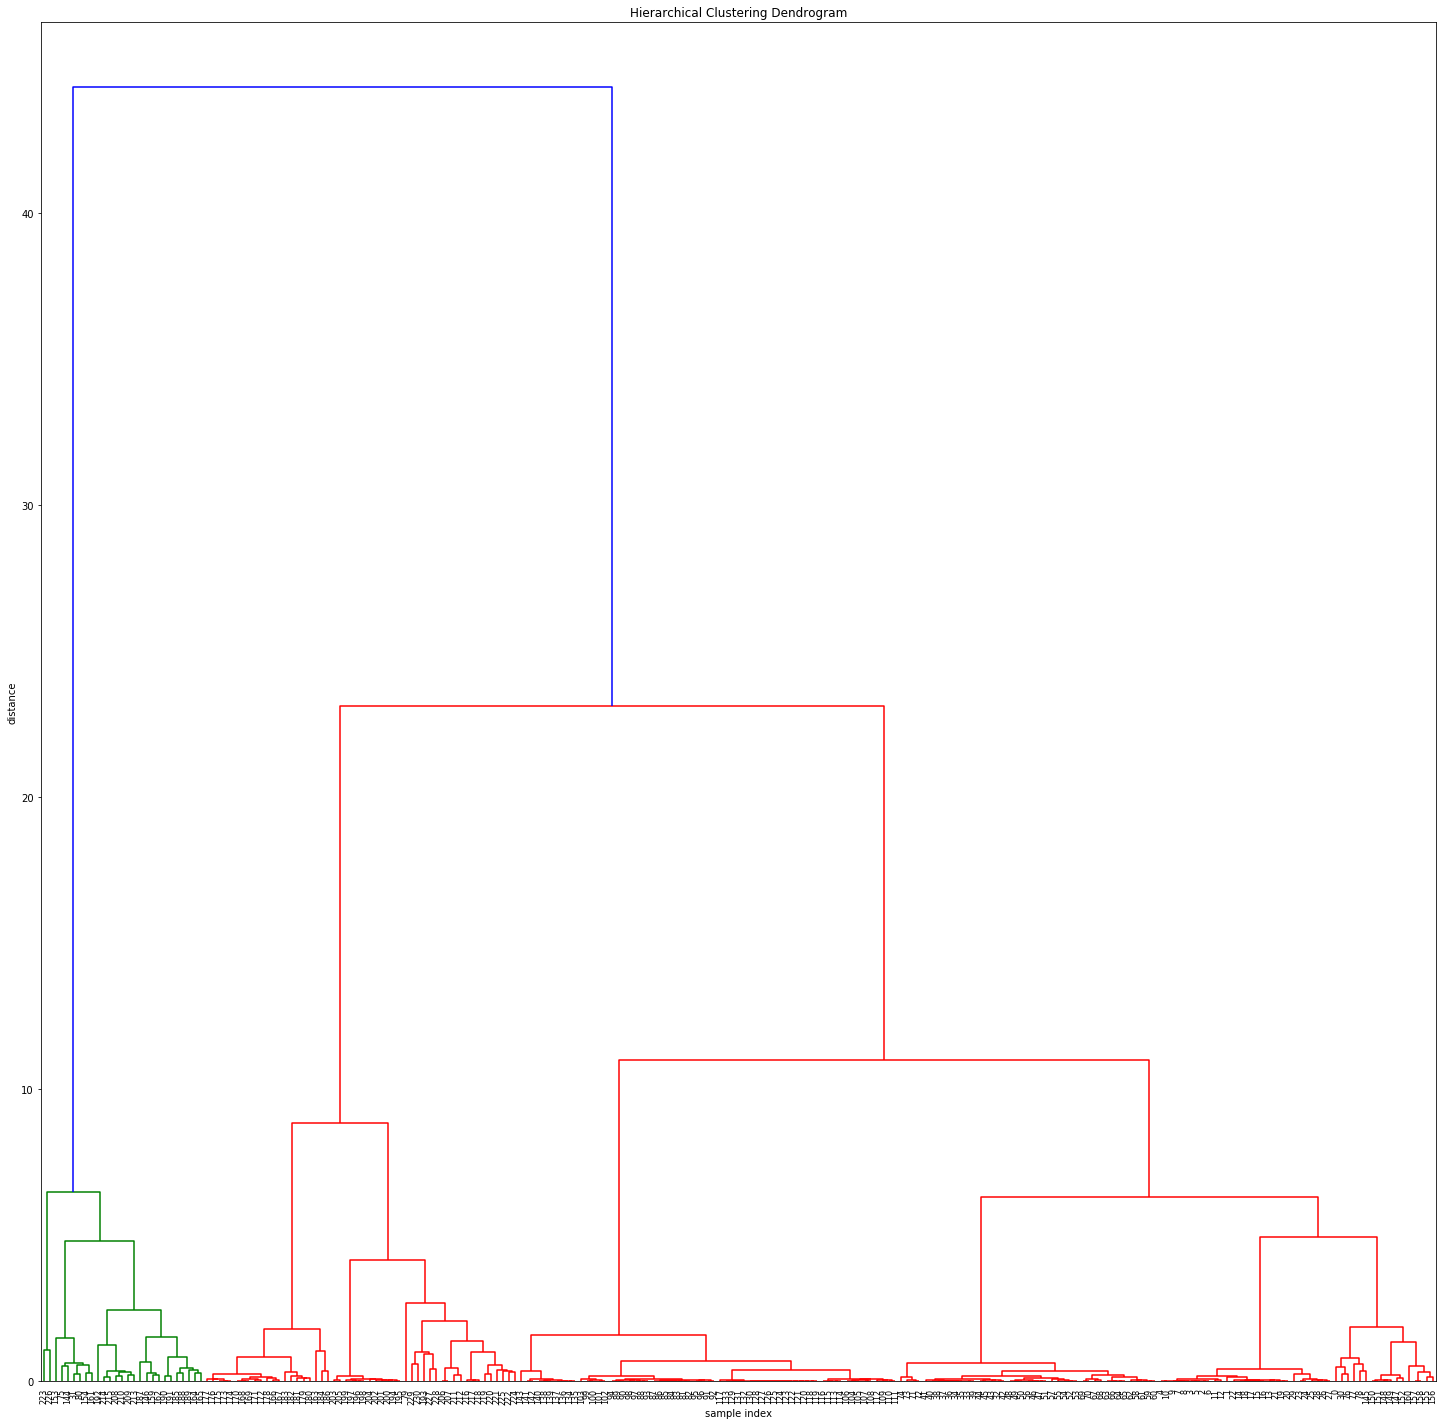

In [558]:
plt.figure(figsize=(25, 25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [543]:
import seaborn as sns
import matplotlib.pylab as plt

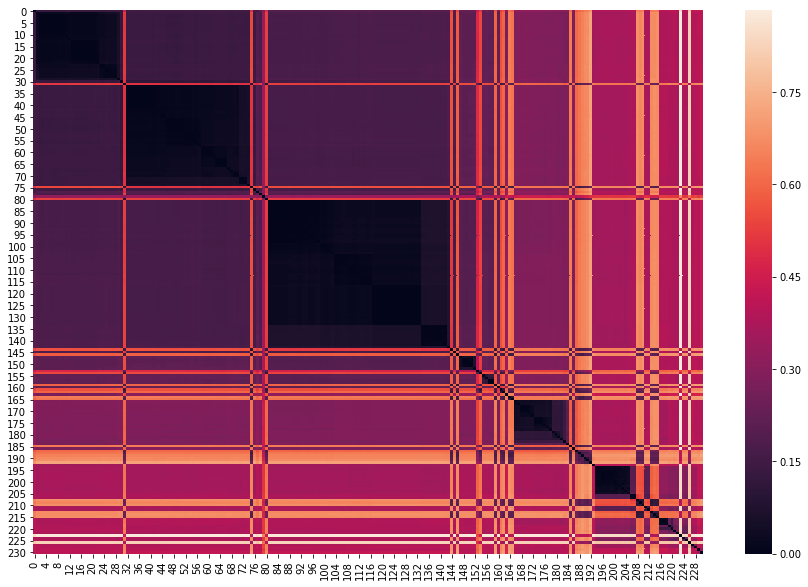

In [554]:
plt.figure(figsize=(15,10))
g = sns.heatmap(dm)

In [550]:
aln2 = AlignIO.read(open('alignments/vinje_and_ped_alignments/orf2_with_fixed_dates.align.fasta'), 'fasta')
# print aln
calculator = DistanceCalculator('identity')
dm2 = calculator.get_distance(aln2)
Z2=linkage(dm2, 'ward')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


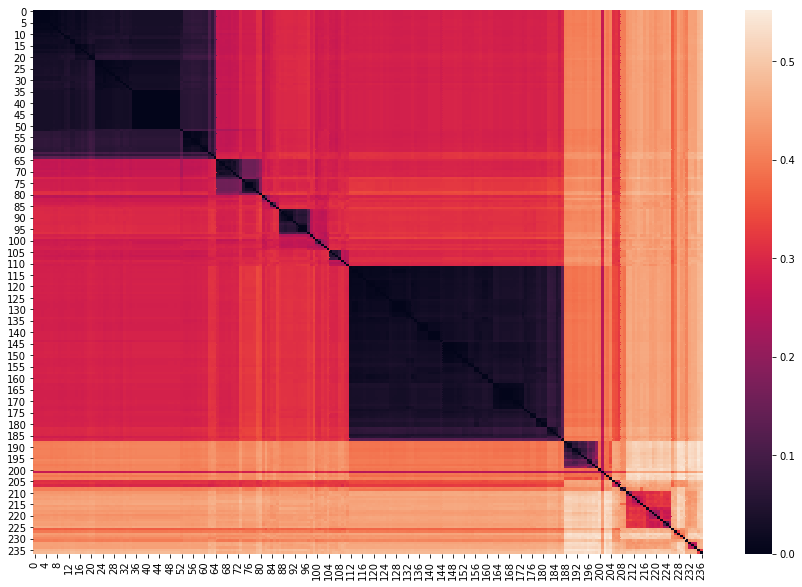

In [551]:
plt.figure(figsize=(15,10))
g2 = sns.heatmap(dm2)

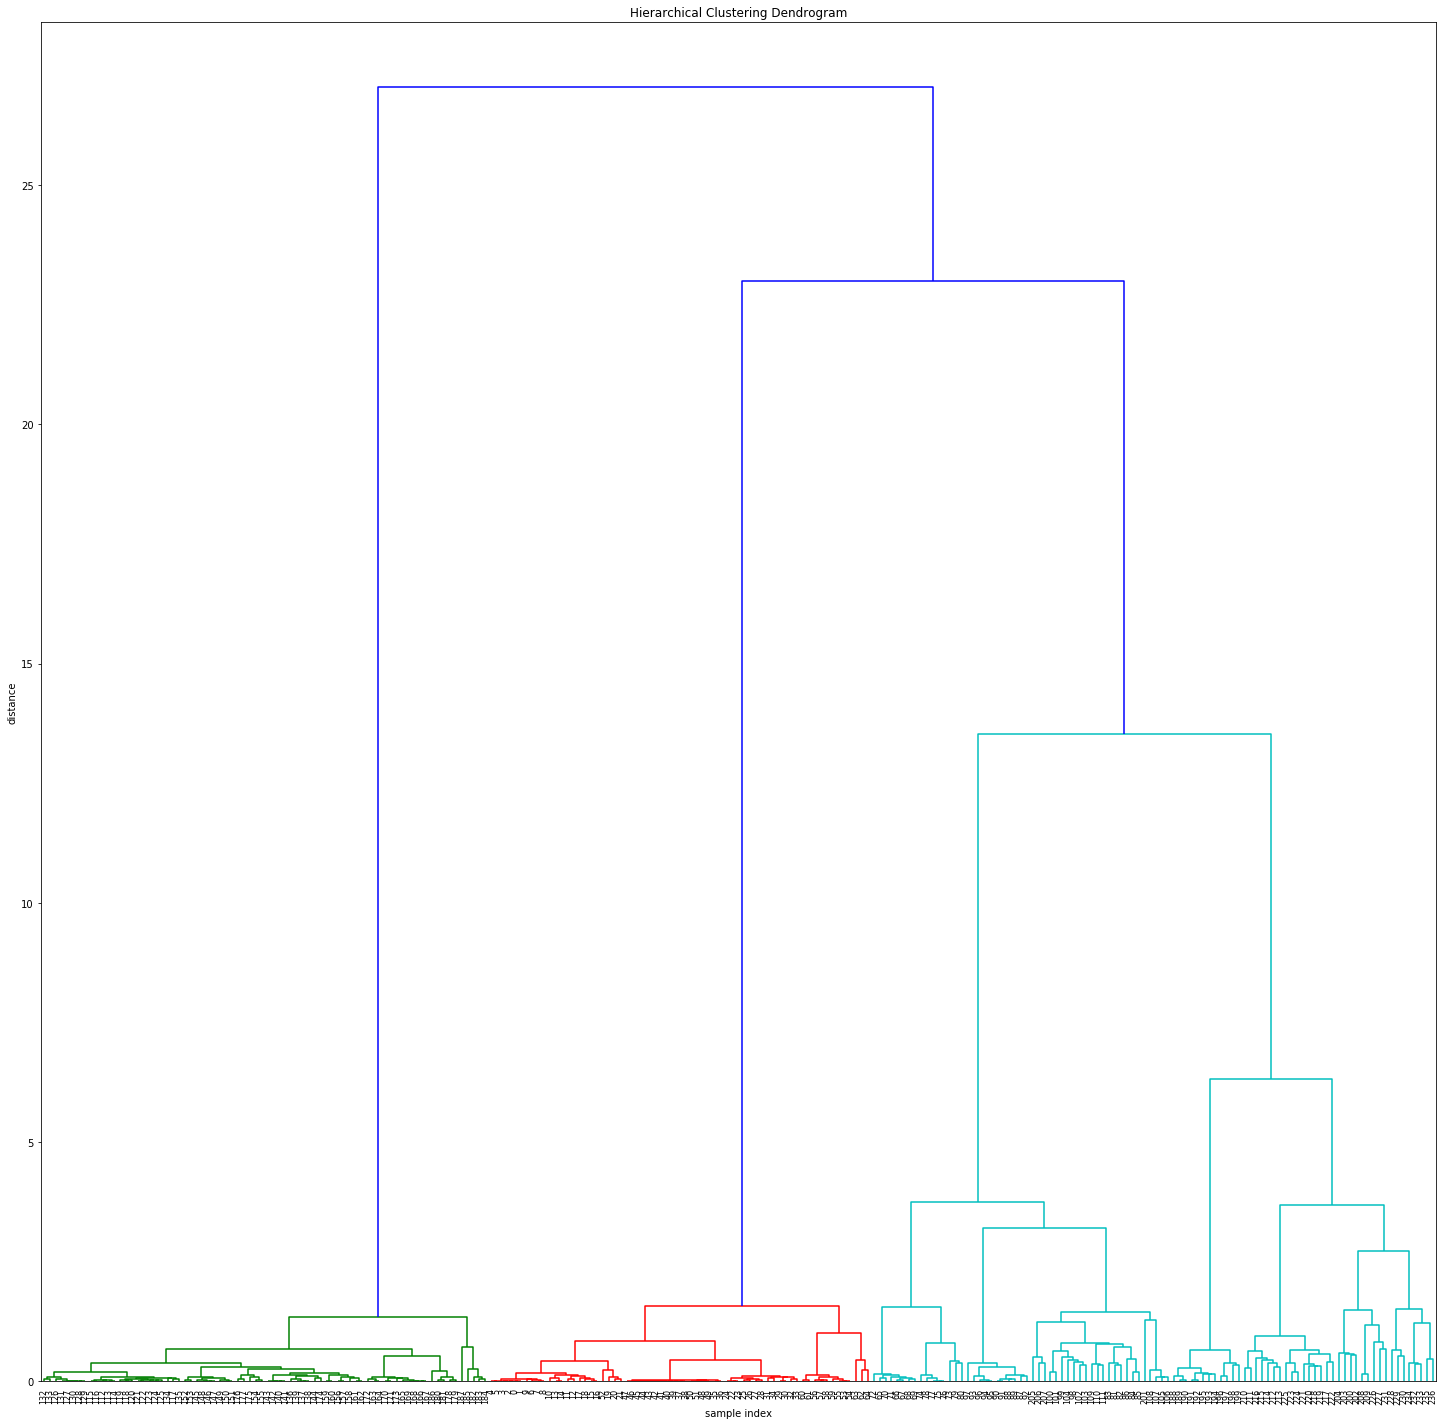

In [559]:
plt.figure(figsize=(25, 25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z2,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [557]:
t = Tree('alignments/vinje_and_ped_alignments/date_fixed.RAxML_bipartitions.raxml_vinje_orf2.tree', format=1)
cluster_dict = collections.defaultdict(list)
c = 0
for node in t.traverse('postorder'):
    print node
    if node.is_leaf(): 
        node.add_features(to_tip=0)
        print 'leaf', node.dist, node.name
        if node.dist < 0.024:
            cluster_dict[c].append(node.name)
            
        else:
            c +=1
            cluster_dict[c].append(node.name)
            
    if node.children:
        
        print 'has children', node.dist, node.name
        dists = []
        for child in node.children:
            dists.append(child.dist)
        print np.mean(dists)
        node.add_features(to_tip=dists)
        
    if node.children:
        r = node.children[1].dist
#         r = [n_dict[i] if i in n_dict else i for i in r] 
#         r = set([x for sublist in r for x in sublist])

        l = node.children[0].dist
        l = [n_dict[i] if i in n_dict else i for i in l]
        l = set([x for sublist in l for x in sublist])        

        a = set.intersection(l, r)
        if len(set.intersection(l, r))==0:
            a = set.union(l,r)
            changes_of_state+=1
        node.var=a
            


--NORO_102|02_07_2014|orf2
leaf 1.00000050003e-06 NORO_102|02_07_2014|orf2

--NORO_107|11_07_2014|orf2
leaf 1.00000050003e-06 NORO_107|11_07_2014|orf2

--NORO_106|10_07_2014|orf2
leaf 1.00000050003e-06 NORO_106|10_07_2014|orf2

--GII.14|14_09_2002|orf2
leaf 0.197061070658 GII.14|14_09_2002|orf2

--GII.8|13_07_2000|orf2
leaf 0.224907514485 GII.8|13_07_2000|orf2

--GII.9|25_07_2016|orf2
leaf 0.21935775305 GII.9|25_07_2016|orf2

   /-GII.8|13_07_2000|orf2
--|
   \-GII.9|25_07_2016|orf2
has children 0.0679583914636 87
0.22213263376730083

   /-GII.14|14_09_2002|orf2
--|
  |   /-GII.8|13_07_2000|orf2
   \-|
      \-GII.9|25_07_2016|orf2
has children 0.0719757948104 96
0.13250973106104735

--NORO_197|04_11_2015|orf2
leaf 0.019973961495 NORO_197|04_11_2015|orf2

--NORO_236|29_01_2016|orf2
leaf 0.0273039416625 NORO_236|29_01_2016|orf2

   /-NORO_197|04_11_2015|orf2
--|
   \-NORO_236|29_01_2016|orf2
has children 0.0160878894436 74
0.023638951578733094

--NORO_200|25_11_2015|orf2
leaf 0.0266162

has children 0.00637459939644 100
1.00000050002909e-06

   /-NORO_143|12_11_2014|orf2
--|
  |   /-NORO_165|21_06_2015|orf2
   \-|
     |   /-NORO_168|23_06_2015|orf2
      \-|
         \-NORO_166|21_06_2015|orf2
has children 0.00372337513532 90
0.005084410626622384

      /-NORO_48-1|01_07_2014|orf2
   /-|
  |  |   /-NORO_150|22_01_2015|orf2
  |   \-|
  |     |   /-NORO_149|22_01_2015|orf2
  |      \-|
--|        |   /-NORO_152|02_02_2015|orf2
  |         \-|
  |            \-NORO_151|31_01_2015|orf2
  |
  |   /-NORO_143|12_11_2014|orf2
   \-|
     |   /-NORO_165|21_06_2015|orf2
      \-|
        |   /-NORO_168|23_06_2015|orf2
         \-|
            \-NORO_166|21_06_2015|orf2
has children 0.00572435623783 71
0.003103172857970642

                  /-NORO_227|07_01_2016|orf2
               /-|
              |   \-NORO_226|06_01_2016|orf2
              |
              |            /-NORO_167|23_06_2015|orf2
              |         /-|
              |        |   \-NORO_164|04_06_2015|or

has children 0.00173626609665 40
0.016274562842792783

               /-NORO_218|24_12_2015|orf2
              |
              |            /-NORO_228|11_01_2016|orf2
              |         /-|
              |      /-|   \-NORO_217|23_12_2015|orf2
            /-|     |  |
           |  |   /-|   \-NORO_214|19_12_2015|orf2
           |  |  |  |
           |  |  |   \-NORO_210|16_12_2015|orf2
           |  |  |
           |   \-|      /-NORO_224|01_01_2016|orf2
           |     |   /-|
           |     |  |   \-NORO_223|01_01_2016|orf2
           |     |  |
         /-|      \-|      /-NORO_230|14_01_2016|orf2
        |  |        |   /-|
        |  |        |  |  |   /-NORO_219|25_12_2015|orf2
        |  |         \-|   \-|
        |  |           |      \-NORO_225|04_01_2016|orf2
        |  |           |
        |  |            \-NORO_220|28_12_2015|orf2
      /-|  |
     |  |  |      /-NORO_232|20_01_2016|orf2
     |  |  |   /-|
     |  |   \-|   \-NORO_222|31_12_2015|orf2
     |  |   

In [ ]:
def traversal(tree,nts,option):
    t = Tree(tree,format=1)
   
    changes_of_state = 0

    c=0
    for node in t.traverse("postorder"):
        c+=1
#         print node
        node.add_features(id=c)
        
        #add snp annotations to the tips of the tree
        if node.is_leaf(): 
            nt=nts[index_dict[node.name]]
            
            if nt in n_dict:
                node.add_features(var=set(n_dict[nt]))
            else:
                node.add_features(var=set(nt))

        if node.children:
            r = set(node.children[1].var)
            r = [n_dict[i] if i in n_dict else i for i in r] 
            r = set([x for sublist in r for x in sublist])
            
            l = set(node.children[0].var)
            l = [n_dict[i] if i in n_dict else i for i in l]
            l = set([x for sublist in l for x in sublist])        
            
            a = set.intersection(l, r)
            if len(set.intersection(l, r))==0:
                a = set.union(l,r)
                changes_of_state+=1
            node.var=a
#     print changes_of_state
#     print t.get_ascii(attributes=["var","id"])  
    if option == 'ACCTRAN':
        bases = acctran(t)
    elif option == 'DELTRAN':
        bases = deltran(t)
    else:
        print('ARGUMENT ISSUE')
    return bases
    

In [536]:
t = Tree('((((H,K)D,(F,I)G)B,E)A,((L,(N,Q)O)J,(P,S)M)C);', format=1)
print t


            /-H
         /-|
        |   \-K
      /-|
     |  |   /-F
   /-|   \-|
  |  |      \-I
  |  |
  |   \-E
--|
  |      /-L
  |   /-|
  |  |  |   /-N
  |  |   \-|
   \-|      \-Q
     |
     |   /-P
      \-|
         \-S


In [ ]:
for record in SeqIO.parse(handle, "gb"):
    print("{}\t{}\t{}".format(record.name, len(record), len(record.features)))